In [1]:
%matplotlib inline


# Pick Event Demo2


compute the mean and standard deviation (stddev) of 100 data sets and plot
mean vs stddev.  When you click on one of the mu, sigma points, plot the raw
data from the dataset that generated the mean and stddev.



/home/jupyterlab/env/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  # This is added back by InteractiveShellApp.init_path()


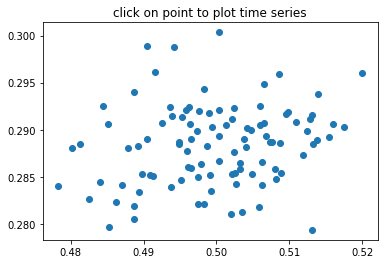

In [2]:
import numpy as np
import matplotlib.pyplot as plt


X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, ax = plt.subplots()
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance


def onpick(event):

    if event.artist != line:
        return True

    N = len(event.ind)
    if not N:
        return True

    figi, axs = plt.subplots(N, squeeze=False)
    for ax, dataind in zip(axs.flat, event.ind):
        ax.plot(X[dataind])
        ax.text(.05, .9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()